This project offers an insight into the development of pop music over the last decades from various aspects based on the data collected from spotify.

### Relevant data needed for this project:

* Information about the top 1000 artists in the genre "Pop";
* All related album information of all pop music artists
* All related track information of all albums of all pop music artists
* All audio features provided by Spotify of all tracks

In [163]:
import os
import pandas as pd
import spotifyapp as sp
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
sns.set_theme()

In [57]:
# check the current working directory
os.getcwd()

'd:\\Dropbox\\Self-Development\\Coding_Projects\\Spotify'

In [58]:
# Create an instance of the SpotifyClient custom class
spotify = sp.SpotifyClient('Pop')

In [59]:
# Get top 1000 Pop music singers
artist_df = spotify.artist_df
artist_df.head(5)

,artist_name,artist_id,artist_popularity,artist_followers
0,Taylor Swift,06HL4z0CvFAxyc27GXpf02,100,78895480
1,Drake,3TVXtAsR1Inumwj472S9r4,95,76999180
2,The Weeknd,1Xyo4u8uXC1ZmMpatF05PJ,95,67500150
3,SZA,7tYKF4w9nC0nq9CsPZTHyP,88,13462684
4,Lana Del Rey,00FQb4jTyendYWaN8pK0wa,90,25346463


In [60]:
# Understand the popularity and follower count distribution of the top 1000 pop music singers.
artist_df.describe()

,artist_popularity,artist_followers
count,1000.00000,1.000000e+03
mean,68.36000,4.601941e+06
std,7.82161,9.750222e+06
min,53.00000,9.129000e+03
25%,62.00000,6.433225e+05
50%,67.00000,1.691224e+06
75%,73.00000,4.407402e+06
max,100.00000,1.132923e+08


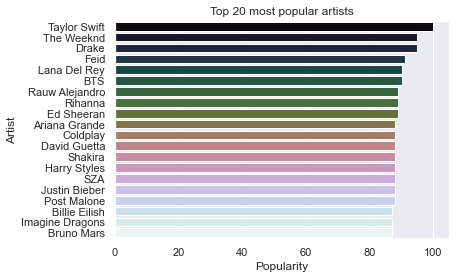

In [177]:
# Get top 20 most popular artists
sns.barplot(data = artist_df.sort_values('artist_popularity', ascending = False)[0:20], y='artist_name', x='artist_popularity', palette = "cubehelix")
plt.xlabel('Popularity')
plt.ylabel('Artist')
plt.title('Top 20 most popular artists')
plt.show()

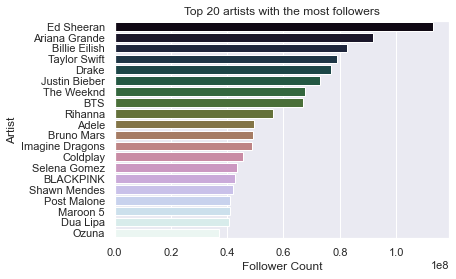

In [176]:
# Get top 20 artists with the most followers
sns.barplot(data = artist_df.sort_values('artist_followers', ascending = False)[0:20], y='artist_name', x='artist_followers', palette = "cubehelix")
plt.xlabel('Follower Count')
plt.ylabel('Artist')
plt.title('Top 20 artists with the most followers')
plt.show()

In [ ]:
# Download album information for the artists
#spotify.get_artist_album()

# generate album dataframes
spotify.create_album_df()
album_df = spotify.album_df

In [148]:
album_df['album_release_date'] = pd.to_datetime(album_df['album_release_date'], format='%Y-%m-%d', errors='coerce')
# add the release year for each album
album_df['album_release_year'] = pd.to_datetime(album_df['album_release_date'], format='%Y-%m-%d', errors='coerce').dt.year
album_df.head(5)

,artist_id,album_id,album_release_date,album_type,album_release_year
0,00FQb4jTyendYWaN8pK0wa,5HOHne1wzItQlIYmLXLYfZ,2023-03-24,album,2023
1,00FQb4jTyendYWaN8pK0wa,2wwCc6fcyhp1tfY3J6Javr,2021-10-22,album,2021
2,00FQb4jTyendYWaN8pK0wa,6QeosPQpJckkW0Obir5RT8,2021-03-19,album,2021
3,00FQb4jTyendYWaN8pK0wa,5XpEKORZ4y6OrCZSKsi46A,2019-08-30,album,2019
4,00FQb4jTyendYWaN8pK0wa,4Eo5r6Sdgdhef6XT66X7ID,2017-07-21,album,2017


In [149]:
album_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33200 entries, 0 to 33199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   artist_id           33200 non-null  object        
 1   album_id            33200 non-null  object        
 2   album_release_date  33200 non-null  datetime64[ns]
 3   album_type          33200 non-null  object        
 4   album_release_year  33200 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.3+ MB


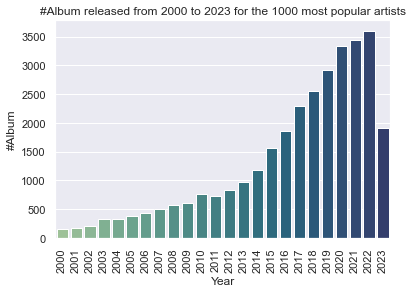

In [175]:
# Plot album number released from 2000 to 2023 for top 1000 most popular artists
sns.barplot(x= list(range(2000,2024))[::-1], y=album_df.groupby('album_release_year').size().sort_index(ascending=False)[0:24], palette= "crest")
plt.xticks(rotation=90)
plt.ylabel('#Album')
plt.xlabel('Year')
plt.title('#Album released from 2000 to 2023 for the 1000 most popular artists')
plt.show()


In [70]:
# Download track information for the albums
#spotify.get_album_track()

# create track dataframes
spotify.create_track_df()
track_df = spotify.track_df

In [71]:
track_df.head(5)

,artist_id,album_id,album_name,album_popularity,album_release_date,track_id,track_name,track_duration(ms)
0,00FQb4jTyendYWaN8pK0wa,5HOHne1wzItQlIYmLXLYfZ,Did you know that there's a tunnel under Ocean...,87,2023-03-24,3KbOflJ5JqHWtmco4PiO3h,The Grants,295201
1,00FQb4jTyendYWaN8pK0wa,5HOHne1wzItQlIYmLXLYfZ,Did you know that there's a tunnel under Ocean...,87,2023-03-24,0HEzuLLojblUOaUSdmJ9gl,Did you know that there's a tunnel under Ocean...,285050
2,00FQb4jTyendYWaN8pK0wa,5HOHne1wzItQlIYmLXLYfZ,Did you know that there's a tunnel under Ocean...,87,2023-03-24,6x8g6DxglrzCSwKhv2Q1ee,Sweet,215295
3,00FQb4jTyendYWaN8pK0wa,5HOHne1wzItQlIYmLXLYfZ,Did you know that there's a tunnel under Ocean...,87,2023-03-24,5nW4z3pfZgJAJ2QTCz9AIE,A&W,433916
4,00FQb4jTyendYWaN8pK0wa,5HOHne1wzItQlIYmLXLYfZ,Did you know that there's a tunnel under Ocean...,87,2023-03-24,4fFqFgMDP9lY8tqEoArFGq,Judah Smith Interlude,276757


In [72]:
track_df['album_release_date'] = pd.to_datetime(track_df['album_release_date'], format='%Y-%m-%d', errors='coerce')
track_df['album_release_year'] = pd.to_datetime(track_df['album_release_date'], format='%Y-%m-%d', errors='coerce').dt.year

In [73]:
track_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214411 entries, 0 to 7640635
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   artist_id           214411 non-null  object        
 1   album_id            214411 non-null  object        
 2   album_name          214411 non-null  object        
 3   album_popularity    214411 non-null  int64         
 4   album_release_date  214411 non-null  datetime64[ns]
 5   track_id            214411 non-null  object        
 6   track_name          214411 non-null  object        
 7   track_duration(ms)  214411 non-null  int64         
 8   album_release_year  214411 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 16.4+ MB


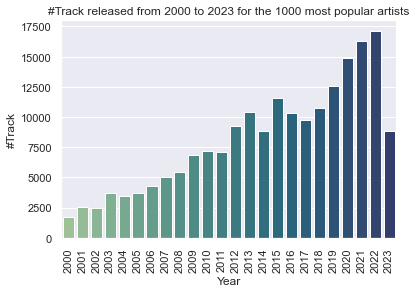

In [174]:
# Plot track number released from 2000 to 2023 for top 1000 most popular artists
sns.barplot(x= list(range(2000,2024))[::-1], y=track_df.groupby('album_release_year').size().sort_index(ascending=False)[0:24], palette= "crest")
plt.xticks(rotation=90)
plt.ylabel('#Track')
plt.xlabel('Year')
plt.title('#Track released from 2000 to 2023 for the 1000 most popular artists')
plt.show()

### Track's Audio Feature:
This project examines 11 music attributes provided by Spotify. Here is the explanation from Spotify's document.

* **Acousticness**: a confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
* **Danceability**: it describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
* **Energy**: it is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.
* **Instrumentalness**: it predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
* **Liveness**: it detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
* **Loudness**: the overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
* **Speechiness**: it detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
* **Valence**: a measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
* **Tempo**: the overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
* **Duration_ms**: the duration of the track in milliseconds.
* **Key**: the key the track is in. Integers map to pitches using standard Pitch Class notation.


In [78]:
#Download the information about track analysis for the tracks
#spotify.get_track_analysis()

spotify.create_analysis_df()
analysis_df = spotify.analysis_df

In [80]:
analysis_df.head(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.364,0.167,7,-12.168,1,0.0361,0.867,0.001160,0.358,0.1430,121.218,audio_features,3KbOflJ5JqHWtmco4PiO3h,spotify:track:3KbOflJ5JqHWtmco4PiO3h,https://api.spotify.com/v1/tracks/3KbOflJ5JqHW...,https://api.spotify.com/v1/audio-analysis/3KbO...,295202,4
1,0.457,0.343,0,-9.387,1,0.0305,0.805,0.018200,0.120,0.0562,119.940,audio_features,0HEzuLLojblUOaUSdmJ9gl,spotify:track:0HEzuLLojblUOaUSdmJ9gl,https://api.spotify.com/v1/tracks/0HEzuLLojblU...,https://api.spotify.com/v1/audio-analysis/0HEz...,285051,4
2,0.326,0.245,0,-12.337,1,0.0293,0.958,0.003890,0.157,0.0695,126.725,audio_features,6x8g6DxglrzCSwKhv2Q1ee,spotify:track:6x8g6DxglrzCSwKhv2Q1ee,https://api.spotify.com/v1/tracks/6x8g6DxglrzC...,https://api.spotify.com/v1/audio-analysis/6x8g...,215295,4
3,0.421,0.247,10,-14.655,1,0.1430,0.665,0.375000,0.115,0.1390,161.468,audio_features,5nW4z3pfZgJAJ2QTCz9AIE,spotify:track:5nW4z3pfZgJAJ2QTCz9AIE,https://api.spotify.com/v1/tracks/5nW4z3pfZgJA...,https://api.spotify.com/v1/audio-analysis/5nW4...,433916,4
4,0.476,0.330,9,-10.480,1,0.1020,0.960,0.000044,0.221,0.3680,77.111,audio_features,4fFqFgMDP9lY8tqEoArFGq,spotify:track:4fFqFgMDP9lY8tqEoArFGq,https://api.spotify.com/v1/tracks/4fFqFgMDP9lY...,https://api.spotify.com/v1/audio-analysis/4fFq...,276757,4


In [81]:
# Merge analysis_df with track_df
track_analysis = analysis_df.merge(track_df[['track_id', 'album_release_year']], left_on='id', right_on= 'track_id', how='left').drop_duplicates(subset='id')

In [82]:
track_analysis.head(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,track_id,album_release_year
0,0.364,0.167,7,-12.168,1,0.0361,0.867,0.001160,0.358,0.1430,121.218,audio_features,3KbOflJ5JqHWtmco4PiO3h,spotify:track:3KbOflJ5JqHWtmco4PiO3h,https://api.spotify.com/v1/tracks/3KbOflJ5JqHW...,https://api.spotify.com/v1/audio-analysis/3KbO...,295202,4,3KbOflJ5JqHWtmco4PiO3h,2023
3,0.457,0.343,0,-9.387,1,0.0305,0.805,0.018200,0.120,0.0562,119.940,audio_features,0HEzuLLojblUOaUSdmJ9gl,spotify:track:0HEzuLLojblUOaUSdmJ9gl,https://api.spotify.com/v1/tracks/0HEzuLLojblU...,https://api.spotify.com/v1/audio-analysis/0HEz...,285051,4,0HEzuLLojblUOaUSdmJ9gl,2023
6,0.326,0.245,0,-12.337,1,0.0293,0.958,0.003890,0.157,0.0695,126.725,audio_features,6x8g6DxglrzCSwKhv2Q1ee,spotify:track:6x8g6DxglrzCSwKhv2Q1ee,https://api.spotify.com/v1/tracks/6x8g6DxglrzC...,https://api.spotify.com/v1/audio-analysis/6x8g...,215295,4,6x8g6DxglrzCSwKhv2Q1ee,2023
9,0.421,0.247,10,-14.655,1,0.1430,0.665,0.375000,0.115,0.1390,161.468,audio_features,5nW4z3pfZgJAJ2QTCz9AIE,spotify:track:5nW4z3pfZgJAJ2QTCz9AIE,https://api.spotify.com/v1/tracks/5nW4z3pfZgJA...,https://api.spotify.com/v1/audio-analysis/5nW4...,433916,4,5nW4z3pfZgJAJ2QTCz9AIE,2023
12,0.476,0.330,9,-10.480,1,0.1020,0.960,0.000044,0.221,0.3680,77.111,audio_features,4fFqFgMDP9lY8tqEoArFGq,spotify:track:4fFqFgMDP9lY8tqEoArFGq,https://api.spotify.com/v1/tracks/4fFqFgMDP9lY...,https://api.spotify.com/v1/audio-analysis/4fFq...,276757,4,4fFqFgMDP9lY8tqEoArFGq,2023


In [83]:
track_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167203 entries, 0 to 214316
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   danceability        167203 non-null  float64
 1   energy              167203 non-null  float64
 2   key                 167203 non-null  int64  
 3   loudness            167203 non-null  float64
 4   mode                167203 non-null  int64  
 5   speechiness         167203 non-null  float64
 6   acousticness        167203 non-null  float64
 7   instrumentalness    167203 non-null  float64
 8   liveness            167203 non-null  float64
 9   valence             167203 non-null  float64
 10  tempo               167203 non-null  float64
 11  type                167203 non-null  object 
 12  id                  167203 non-null  object 
 13  uri                 167203 non-null  object 
 14  track_href          167203 non-null  object 
 15  analysis_url        167203 non-nul

In [84]:
track_analysis.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,album_release_year
count,167203.000000,167203.000000,167203.000000,167203.000000,167203.000000,167203.000000,167203.000000,167203.000000,167203.000000,167203.000000,167203.000000,1.672030e+05,167203.000000,167203.000000
mean,0.587219,0.639454,5.262729,-7.548209,0.649193,0.095972,0.265348,0.084870,0.229788,0.478389,121.253055,2.263552e+05,3.922579,2011.770823
std,0.162865,0.227922,3.597884,3.827607,0.477224,0.118687,0.303138,0.228666,0.213500,0.236839,28.739610,9.964670e+04,0.390731,10.950236
min,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.344000e+03,0.000000,1959.000000
25%,0.481000,0.480000,2.000000,-9.140000,0.000000,0.035500,0.017400,0.000000,0.098000,0.292000,98.999000,1.841330e+05,4.000000,2008.000000
50%,0.600000,0.675000,5.000000,-6.678000,1.000000,0.049900,0.122000,0.000008,0.137000,0.467000,122.004000,2.158130e+05,4.000000,2015.000000
75%,0.706000,0.828000,8.000000,-4.978000,1.000000,0.096700,0.461000,0.003030,0.295000,0.660000,138.198000,2.538200e+05,4.000000,2020.000000
max,0.987000,1.000000,11.000000,1.529000,1.000000,0.966000,0.996000,0.999000,1.000000,1.000000,249.895000,4.777827e+06,5.000000,2023.000000


In [85]:
# Determine the average value of the respective music attributes per year
track_analysis_by_year = track_analysis.groupby('album_release_year').mean().sort_index(ascending=False).reset_index()

In [86]:
track_analysis_by_year

,album_release_year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,2023,0.597311,0.656578,5.290736,-7.184989,0.634923,0.085217,0.258965,0.089461,0.225577,0.453486,122.371304,200739.351102,3.925947
1,2022,0.604693,0.646089,5.233978,-7.083310,0.643667,0.089928,0.256549,0.067849,0.207323,0.475135,121.790513,201866.298443,3.924804
2,2021,0.603416,0.628692,5.243025,-7.204270,0.645379,0.091179,0.275753,0.069781,0.199266,0.470887,120.755129,203342.828985,3.927660
3,2020,0.606781,0.623913,5.234065,-7.215711,0.621560,0.099156,0.276988,0.067599,0.209683,0.459663,120.481623,205860.570359,3.917712
4,2019,0.610290,0.632704,5.226584,-7.372145,0.616806,0.102391,0.271362,0.077850,0.219256,0.454732,119.919265,212980.785564,3.928521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,1963,0.525959,0.524715,5.510345,-9.599138,0.848276,0.037872,0.510476,0.086413,0.199620,0.722297,123.876324,138114.531034,3.668966
61,1962,0.606952,0.488339,4.790323,-10.650016,0.967742,0.042087,0.611431,0.017747,0.161850,0.717339,122.283774,144685.000000,3.741935
62,1961,0.533667,0.525333,6.208333,-11.368125,0.875000,0.060271,0.713667,0.006135,0.255538,0.757833,112.102125,142181.666667,3.791667
63,1960,0.621167,0.468667,3.833333,-12.919000,1.000000,0.082175,0.736417,0.137794,0.133175,0.843917,110.549250,135096.666667,3.666667


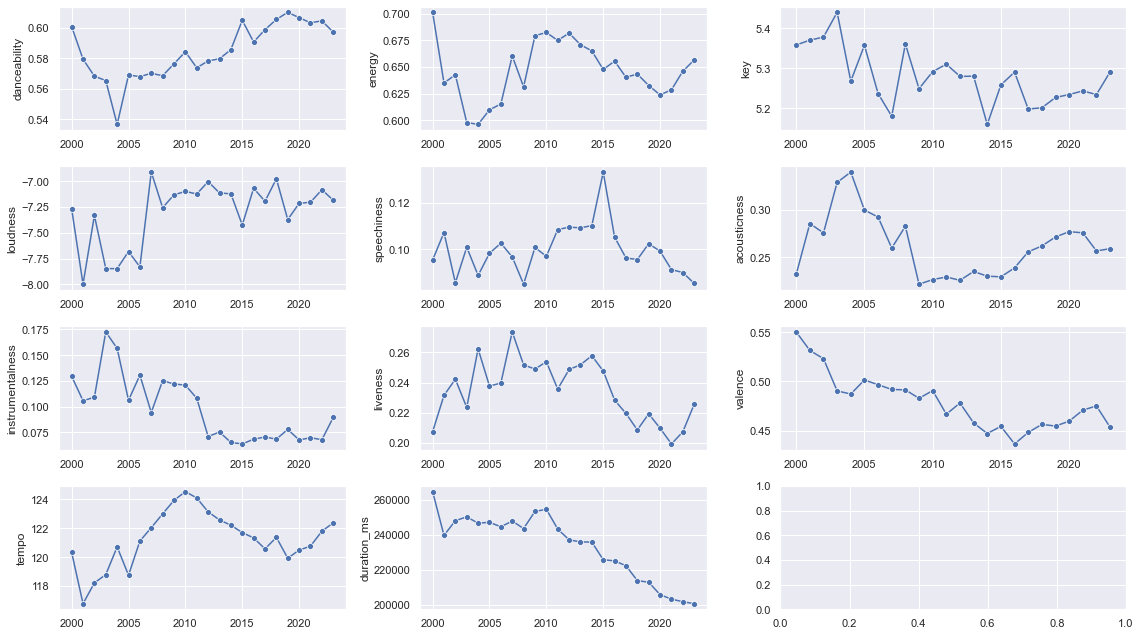

In [169]:
# Define plotting region (4 rows, 3 columns) with increased subplot sizes
fig, axes = plt.subplots(4, 3, gridspec_kw={'width_ratios': [1, 1, 1.2]}, figsize=(16, 9))

# Define the list of columns to plot
columns = ['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness',
                   'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

# Loop over the columns and create scatterplots in each subplot
for i, column in enumerate(columns):
    row = i // 3
    col = i % 3
    sns.lineplot(data=track_analysis_by_year[0:24], x=list(range(2000, 2024))[::-1], y=column, ax=axes[row, col],  marker='o')

# Adjust the layout and display the plot
fig.tight_layout()
plt.show()


### Stock Market
Given the change in the respective audio features over years, it would also be interesting to examine their connection to the economy. Therefore, the Nasdaq Composite Index, the S&P 500 Index and the Dow Jones Index are used as proxies for the economy.

In [115]:
# Download the information about specific stocks

def stock_df(stocks):
    stock_df = pd.DataFrame()
    for stock in stocks:
        st = yf.Ticker(stock).history(period="max").reset_index()
        st['Year'] = st['Date'].dt.year
        st_close_per_year = st.groupby('Year')['Close'].mean().to_frame(
            stock).reset_index()
        try:
            stock_df = stock_df.merge(st_close_per_year,
                                    how='inner',
                                    on='Year')
        except KeyError:
            stock_df = st_close_per_year
    return (stock_df)

stock_list = ['^IXIC', '^DJI', '^SPX']
stock_df = stock_df(stock_list)

In [150]:
stock_df.tail(5)

,Year,^IXIC,^DJI,^SPX
27,2019,7940.129365,26379.543798,2913.356380
28,2020,10201.506435,26890.673612,3217.855849
29,2021,14371.662404,34055.289690,4273.385635
30,2022,12231.348532,32897.345166,4098.514748
31,2023,12130.909172,33451.481339,4113.230236


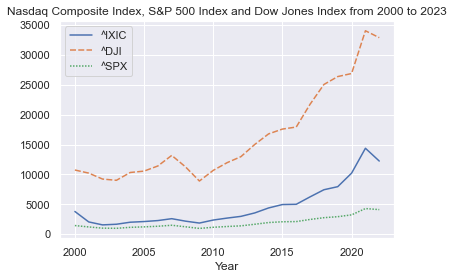

In [178]:
# Plot Nasdaq, S&P500 and Dow Jones from 2000 to 2023
sns.lineplot(data = stock_df.set_index('Year')[-24:-1])
plt.title('Nasdaq Composite Index, S&P 500 Index and Dow Jones Index from 2000 to 2023')
plt.show()

### The connection between the development of audio features and the stock markets over years

In [125]:
# merge track analysis and stokes to determine the respective correlation
df = track_analysis_by_year.merge(stock_df, left_on='album_release_year', right_on='Year', how='left')[columns + stock_list].dropna()

In [139]:
df.head(5)

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,^IXIC,^DJI,^SPX
0,0.597311,0.656578,5.290736,-7.184989,0.085217,0.258965,0.089461,0.225577,0.453486,122.371304,200739.351102,12130.909172,33451.481339,4113.230236
1,0.604693,0.646089,5.233978,-7.083310,0.089928,0.256549,0.067849,0.207323,0.475135,121.790513,201866.298443,12231.348532,32897.345166,4098.514748
2,0.603416,0.628692,5.243025,-7.204270,0.091179,0.275753,0.069781,0.199266,0.470887,120.755129,203342.828985,14371.662404,34055.289690,4273.385635
3,0.606781,0.623913,5.234065,-7.215711,0.099156,0.276988,0.067599,0.209683,0.459663,120.481623,205860.570359,10201.506435,26890.673612,3217.855849
4,0.610290,0.632704,5.226584,-7.372145,0.102391,0.271362,0.077850,0.219256,0.454732,119.919265,212980.785564,7940.129365,26379.543798,2913.356380


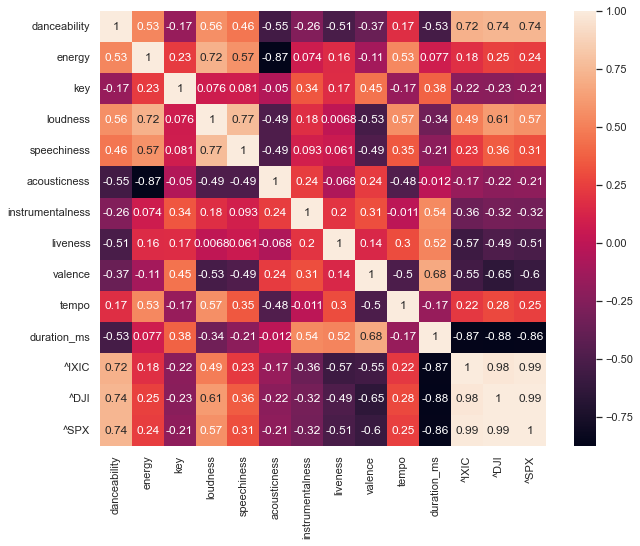

In [172]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)
plt.show()